In [8]:
import pandas as pd
import requests
import json
import glob, os
import numpy as np
api = 'c4ad87b03bec1878bc0be6156d4472b0'
pd.options.display.float_format = '{:,.2f}'.format

In [9]:
def get_prices(ticker):
    
    
    prices_request = requests.get(f'https://financialmodelingprep.com/api/v3/historical-price-full/{ticker}?apikey={api}').json()
    

    #dates_df = pd.DataFrame.from_dict(prices_request,orient='columns')
    out_file = open(f"{ticker}.json", "w") 
    json.dump(prices_request, out_file, indent = 4) 
    out_file.close() 
    
    with open(f'{ticker}.json','r') as f:
        data = json.loads(f.read())
    # Flatten data
    df_nested_list = pd.json_normalize(data, record_path =['historical'])
    df_nested_list['Ticker'] = ticker
    df_nested_list.to_csv(f"prices/{ticker}.csv")
    #return df_nested_list

    

In [10]:
SP500_df = pd.read_csv('sp500_constituent.csv')
tickers = SP500_df['symbol']
tech = SP500_df[SP500_df['sector']=='Information Technology']['symbol']

result = [get_prices(ticker) for ticker in tech]

In [11]:
path = '/Users/brendan/Desktop/Python/BoostedAI/prices'
csv_files = [f for f in os.listdir(path) if f.endswith('csv')]
csv_files

['CSCO.csv',
 'TER.csv',
 'V.csv',
 'QRVO.csv',
 'FLT.csv',
 'SWKS.csv',
 'ENPH.csv',
 'MCHP.csv',
 'CDNS.csv',
 'APH.csv',
 'MSI.csv',
 'GPN.csv',
 'DXC.csv',
 'ADI.csv',
 'ADBE.csv',
 'NOW.csv',
 'ZBRA.csv',
 'BR.csv',
 'STX.csv',
 'CDAY.csv',
 'ORCL.csv',
 'INTU.csv',
 'PAYC.csv',
 'INTC.csv',
 'GLW.csv',
 'TXN.csv',
 'FTNT.csv',
 'JNPR.csv',
 'ADSK.csv',
 'WDC.csv',
 'PYPL.csv',
 'MSFT.csv',
 'ANSS.csv',
 'IT.csv',
 'ACN.csv',
 'VRSN.csv',
 'HPQ.csv',
 'AMAT.csv',
 'AMD.csv',
 'KLAC.csv',
 'NXPI.csv',
 'SEDG.csv',
 'NVDA.csv',
 'TYL.csv',
 'HPE.csv',
 'TWLO.csv',
 'CTXS.csv',
 'PTC.csv',
 'FIS.csv',
 'NLOK.csv',
 'IBM.csv',
 'MPWR.csv',
 'AKAM.csv',
 'ANET.csv',
 'PAYX.csv',
 'FFIV.csv',
 'SNPS.csv',
 'EPAM.csv',
 'AVGO.csv',
 'TEL.csv',
 'JKHY.csv',
 'ADP.csv',
 'ON.csv',
 'TRMB.csv',
 'QCOM.csv',
 'FISV.csv',
 'MA.csv',
 'AAPL.csv',
 'NTAP.csv',
 'KEYS.csv',
 'CTSH.csv',
 'MU.csv',
 'CDW.csv',
 'CRM.csv',
 'LRCX.csv']

In [15]:
raw_data_df = []
for file in csv_files:
    file = pd.read_csv('/Users/brendan/Desktop/Python/BoostedAI/prices/'+file)
    df = pd.DataFrame(file)
    #df['ticker'] = file
    raw_data_df.append(df)
master_df = pd.concat(raw_data_df)
daily_07_26 = master_df[master_df['date']=='2022-07-27']
daily_07_26 = daily_07_26.sort_values(by=['changePercent'])

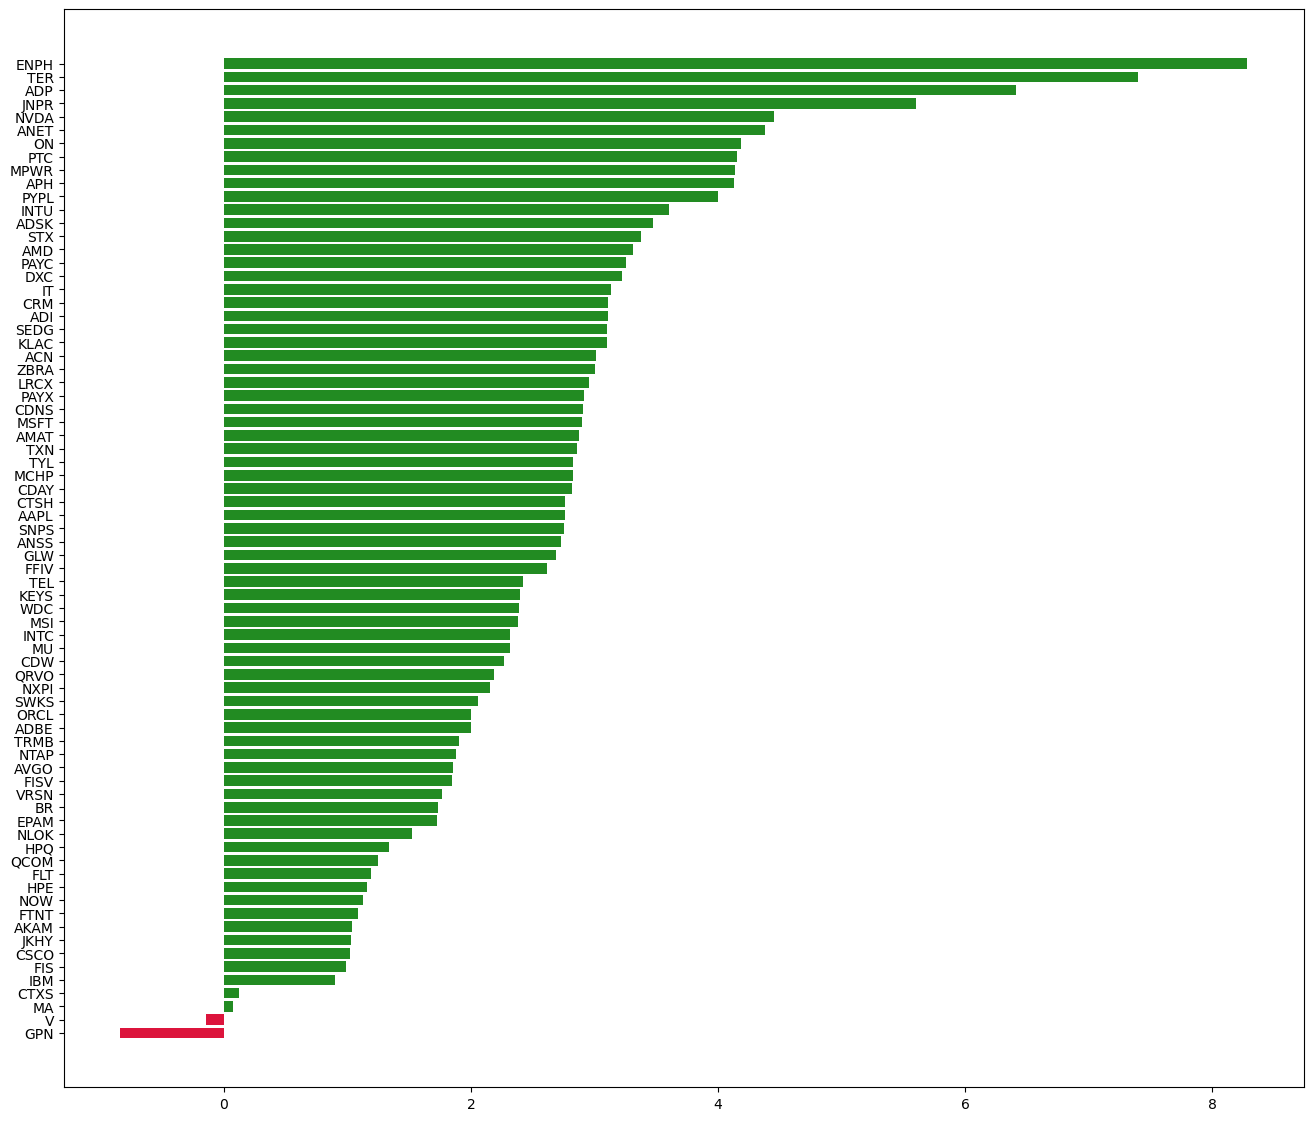

In [16]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(16,14))
clrs = ['red' if (x < 0) else 'green' for x in daily_07_26['changePercent'] ]

plt.barh(
    daily_07_26['Ticker'], daily_07_26['changePercent'],
    color=np.where(daily_07_26['changePercent'] < 0, 'crimson', 'forestgreen'),
)
plt.show()

In [14]:
import smtplib, ssl 
 
port = 465  # For SSL 
#password = input("type-your-password-here") 
smtp_server = "smtp.gmail.com"
# using a secure SSL context 
context = ssl.create_default_context() 
#this will be used to send our email 
 
#with smtplib.SMTP_SSL("smtp.gmail.com", port, context=context) as server: 
    #server.login("erhardbr@gmail.com", password)

sender_email = "erhardbr@gmail.com"  #put in your email address here 
receiver_email = "erhardbr@gmail.com"  #put in your receiver email address here 
password = input("type-your-password-here") 
message = """\ 
Subject: Hi there 
 
This message is to notify you my friend....""" 
 
context = ssl.create_default_context() 
 
with smtplib.SMTP_SSL(smtp_server, port, context=context) as server: 
    server.login(sender_email, password) 
    server.sendmail(sender_email, receiver_email, message)

type-your-password-hereCotuit1429$$


SMTPAuthenticationError: (535, b'5.7.8 Username and Password not accepted. Learn more at\n5.7.8  https://support.google.com/mail/?p=BadCredentials f3-20020a4ab643000000b004357c1d1efasm1293749ooo.21 - gsmtp')